### Enity Resolution
*Deduplication: eliminate duplicate (or exact) copies of repeated data

*Record linkage: identify records that reference the same entity

*Canonicalisation: unify records or convert data into a standard form

An article by Gartner estimates that for each record it takes 1 dollar to verify as it is entered, 10 dollar to cleanse and deduplicate it and 100 dollar if nothing is done, as the ramifications of the mistakes are felt over and over again.

An ER pipeline is a sequence of steps or stages that process the records from the input sources to the output matches or links. This process typically consists of four stages: preprocessing, blocking, matching, and merging. Preprocessing involves cleaning, standardizing, and transforming the records into a common format and structure, often utilizing NLP techniques such as NER, EL, and text normalization. Blocking reduces the search space and number of comparisons by partitioning the records into blocks or buckets based on criteria or rules such as hashing, blocking keys, or locality-sensitive hashing (LSH). Matching then compares and scores the records within each block or across blocks based on their attributes or features, using NLP techniques such as text similarity, text embedding, or supervised learning models. Finally, merging aggregates and resolves the matches or links into clusters or groups of records that represent the same entity, using techniques such as transitive closure, clustering algorithms, or entity consolidation.

* Mounting the data from the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

#### Getting Data


In [ ]:
#Data paths
training_data_folder_path = '/content/drive/MyDrive/Customer Entity Resolution _ Application Prefill/Training'
testing_data_folder_path = '/content/drive/MyDrive/Customer Entity Resolution _ Application Prefill/Test'
validation_data_folder_path = '/content/drive/MyDrive/Customer Entity Resolution _ Application Prefill/Validation'
credit_bureau_data_path = '/content/drive/MyDrive/Customer Entity Resolution _ Application Prefill/Customer Demographics - Credit Bureau.xlsx'
train_in_path = training_data_folder_path + '/Training Data.xlsx'
train_out_path = training_data_folder_path + '/Training Data - Ground Truth.xlsx'
test_in_path = testing_data_folder_path + '/Test Data.xlsx'
test_out_path = testing_data_folder_path + '/Test Data - Ground Truth.xlsx'
validation_in_path = validation_data_folder_path + '/Validation Data.xlsx'

In [ ]:
# Loding the data using pandas
train_in = pd.read_excel(train_in_path)
train_out = pd.read_excel(train_out_path)
test_in = pd.read_excel(test_in_path)
test_out = pd.read_excel(test_out_path)
val_in = pd.read_excel(validation_in_path)

In [ ]:
# Loding the credit bureau data
id_listing = pd.read_excel(credit_bureau_data_path)

In [ ]:
#Merging train date with the ground truth
train = train_in.merge(train_out,left_on='Cust ID',right_on = 'Cust ID')

In [ ]:
train = train.merge(id_listing,left_on='Credit Bureau ID',right_on='id')

In [ ]:
train.columns


Index(['Cust ID', 'First Name', 'Middle Name', 'Last Name', 'Prefix', 'Suffix',
       'Address Line 1', 'Address Line 2', 'City', 'State', 'Zip', 'DOB_x',
       'Credit Bureau ID', 'id', 'first_name', 'Middle name', 'last_name',
       'prefix', 'suffix', 'addr 1', 'addr 2', 'city', 'state', 'zip',
       'DOB_y'],
      dtype='object')

In [ ]:
train.head(5)

,Cust ID,First Name,Middle Name,Last Name,Prefix,Suffix,Address Line 1,Address Line 2,City,State,...,Middle name,last_name,prefix,suffix,addr 1,addr 2,city,state,zip,DOB_y
0,CustID_101,ALAN LANEE,LANEE,A MENTZER,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,MENTZER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustID_102,HAPPY T,M,"TRAVELLER, HAPPY",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,TRAVELLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1965-02-05 00:00:00
2,CustID_103,"DILSON, ROCKLIN",Dlison,"ROCKLIN, D",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ROCKLIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983-03-15 00:00:00
3,CustID_104,HAPP,",",TRAVELLE R,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,TRAVELLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1981-01-01 00:00:00
4,CustID_106,H,appy,TRAVELLER,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,TRAVELLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1981-01-01 00:00:00


In [ ]:
test = test_in.merge(test_out,left_on='Cust ID',right_on = 'Cust ID')
test = test.merge(id_listing,left_on='Credit Bureau ID', right_on = 'id')

## Data Preprocessing
* Decided to go with Data Cleaning, Handling mising values, Standardizing the Name, DOB, Address. Depending on the model choosen might do further preprocessing. Other techiniques will be the NLP ones like (NER, EL and Text normalization)

In [ ]:
# Checking for the columns with the missing data in training dataset
train.isna().sum()

Cust ID               0
First Name            0
Middle Name          93
Last Name             0
Prefix              160
Suffix              153
Address Line 1       62
Address Line 2      160
City                 62
State                62
Zip                  62
DOB_x                 5
Credit Bureau ID      0
id                    0
first_name            0
Middle name         108
last_name             0
prefix              160
suffix              153
addr 1               62
addr 2              160
city                 82
state                62
zip                  63
DOB_y                 5
dtype: int64

In [ ]:
# Checking for the columns with missing data in testing data set
test.isna().sum()

Cust ID              0
First Name           0
Middle Name         21
Last Name            0
Prefix              54
Suffix              45
Address Line 1       0
Address Line 2      50
City                 0
State                0
Zip                  0
DOB_x                0
Credit Bureau ID     0
id                   0
first_name           0
Middle name         22
last_name            0
prefix              54
suffix              45
addr 1               0
addr 2              50
city                 1
state                1
zip                  2
DOB_y                0
dtype: int64

#### Data Cleaning

Based on the above data manually inputing the missing values for each column  based on the type of data we need to input. handle_missing_value id the function to input the missing data.

In [ ]:
def handle_missing_values(data):
  # Filling these columns with empty string place holder
  unknown_placeholder_columns = ['Middle Name', 'Middle name', 'Address Line 1', 'Address Line 2',
                                  'City', 'State', 'addr 1', 'addr 2', 'city', 'state']

  # Filling these columns with empty string placeholder
  empty_placeholder_columns = ['Prefix', 'Suffix', 'prefix', 'suffix']

  # Filling these columns with '00000' placeholder
  zip_placeholder_columns = ['Zip', 'zip']

  # Filling date with default date placeholder
  date_placeholder_columns = ['DOB_x', 'DOB_y']

  # Applying empty string placeholder
  data[unknown_placeholder_columns] = data[unknown_placeholder_columns].fillna('')

  # Applying empty string placeholder
  data[empty_placeholder_columns] = data[empty_placeholder_columns].fillna('')

  # Applying '00000' placeholder
  data[zip_placeholder_columns] = data[zip_placeholder_columns].fillna('00000')

  # Adding not clear date placeholder
  not_clear_date = 'not clear'
  data[date_placeholder_columns] = data[date_placeholder_columns].fillna(not_clear_date)

  return data


In [ ]:
# Handling missing vales for train dataset
train = handle_missing_values(train)

In [ ]:
# Handling missing vales for test dataset
test = handle_missing_values(test)

In [ ]:
train.isna().sum()

Cust ID             0
First Name          0
Middle Name         0
Last Name           0
Prefix              0
Suffix              0
Address Line 1      0
Address Line 2      0
City                0
State               0
Zip                 0
DOB_x               0
Credit Bureau ID    0
id                  0
first_name          0
Middle name         0
last_name           0
prefix              0
suffix              0
addr 1              0
addr 2              0
city                0
state               0
zip                 0
DOB_y               0
dtype: int64

## Data standardization

Bringing all the data into the standard format for date used the month/day/year, conerting state in the abbreviated format to the full state name, if there are any descrepecies in the sate name using the fuzzy string mapping to get best possible word. converting the name, address all these columns into the small letters, removing the spaces and non string values

In [ ]:
!pip install fuzzywuzzy -q

In [ ]:
from fuzzywuzzy import process
import re
def guess_state(state):
  state = str(state)

  if not state.strip():  # Empty or only contains whitespace
      return state

  # Removing spaces and uncessary symbols
  state = re.sub(r'[^a-zA-Z0-9]', '', state)


  #List of all states
  choices = [
        ('Alabama', 'AL'), ('Alaska', 'AK'), ('Arizona', 'AZ'), ('Arkansas', 'AR'),
        ('California', 'CA'), ('Colorado', 'CO'), ('Connecticut', 'CT'), ('Delaware', 'DE'),
        ('Florida', 'FL'), ('Georgia', 'GA'), ('Hawaii', 'HI'), ('Idaho', 'ID'),
        ('Illinois', 'IL'), ('Indiana', 'IN'), ('Iowa', 'IA'), ('Kansas', 'KS'),
        ('Kentucky', 'KY'), ('Louisiana', 'LA'), ('Maine', 'ME'), ('Maryland', 'MD'),
        ('Massachusetts', 'MA'), ('Michigan', 'MI'), ('Minnesota', 'MN'), ('Mississippi', 'MS'),
        ('Missouri', 'MO'), ('Montana', 'MT'), ('Nebraska', 'NE'), ('Nevada', 'NV'),
        ('New Hampshire', 'NH'), ('New Jersey', 'NJ'), ('New Mexico', 'NM'), ('New York', 'NY'),
        ('North Carolina', 'NC'), ('North Dakota', 'ND'), ('Ohio', 'OH'), ('Oklahoma', 'OK'),
        ('Oregon', 'OR'), ('Pennsylvania', 'PA'), ('Rhode Island', 'RI'), ('South Carolina', 'SC'),
        ('South Dakota', 'SD'), ('Tennessee', 'TN'), ('Texas', 'TX'), ('Utah', 'UT'),
        ('Vermont', 'VT'), ('Virginia', 'VA'), ('Washington', 'WA'), ('West Virginia', 'WV'),
        ('Wisconsin', 'WI'), ('Wyoming', 'WY')
    ]

  # Checking for direct abbreviation match
  for choice in choices:
      if len(state) == 2 and state.upper() == choice[1]:
          return choice[0]

  # Doing the fuzzy match
  best_match, best_score = None, 0
  for choice in choices:
      match, score = process.extractOne(state, [choice[0]])
      if score > 75 and score > best_score:
          best_match = match
          best_score = score

  if best_match:
      return best_match
  else:
      return state

# Checking for sample example
state = 'LA'
parsed_state = guess_state(state)
print(parsed_state)

Louisiana


##### Tried using the directly the standard python library datetime.strptime for the date parsing, as the variations are huge the library not handling all cases doing it manually with all possible formats and checking the formats which are difficult to handle.

In [ ]:
from dateutil.parser import parse
from datetime import datetime

def custom_parse(date_str):
  date_str = str(date_str)

  try:
    #  Parsing using dateutil.parser
    parsed_date = parse(date_str, fuzzy=True)
    if parsed_date.year >= 1900:
        return parsed_date.strftime('%m/%d/%Y')
  except:
    pass

  try:
    # Attempting to parse other formats
    formats = ['%Y-%m-%d %H:%M:%S', '%m/%d/%Y', '%m-%d-%Y', '%m.%d.%Y']
    for format_str in formats:
        try:
          parsed_date = datetime.strptime(date_str, format_str)
          return parsed_date.strftime('%m/%d/%Y')
        except:
          pass
  except:
      pass

  # Handling other date formats
  try:
    if "not clear" in date_str.lower():
      return date_str  # Leave as is

    # Checking for abbreviated month names
    month_abbr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    for abbr in month_abbr:
      if abbr in date_str:
        month_num = str(month_abbr.index(abbr) + 1).zfill(2)
        return date_str.replace(abbr, month_num)

  except:
      pass

  # If no format matches, printing the unparseable date and returning the original string
  print("Unparseable date:", date_str)
  return date_str

# Example usage:
date_str = "2023-07-28 00:00:00"
parsed_date = custom_parse(date_str)
print("Parsed date:", parsed_date)


Parsed date: 07/28/2023


In [ ]:
import re
def standardize_data(data):

  # A copy of the DataFrame to work with
  data_copy = data.copy()

  # Standardizing the DOB format to month/day/year
  data_copy.loc[:, 'DOB_x'] = data_copy['DOB_x'].apply(custom_parse)
  data_copy.loc[:, 'DOB_y'] = data_copy['DOB_y'].apply(custom_parse)


  # Guessing the state names using mapping and guessing
  data_copy.loc[:, 'State'] = data_copy['State'].apply(guess_state)

  # Standardizing Zip Code format to first five characters
  data_copy.loc[:, 'Zip'] = data_copy['Zip'].apply(lambda zip_code: re.sub(r'[^\d-]', '', str(zip_code)))


  # Standardizing the name columns to lowercase and removing the leading/trailing spaces, also cleaning the ,
  name_columns = ['First Name', 'Middle Name', 'Last Name', 'first_name', 'Middle name', 'last_name']
  for col in name_columns:
    data_copy.loc[:, col] = data_copy[col].str.strip().str.lower()
    data_copy[col] = data_copy[col].str.split(',').apply(lambda parts: [part.strip() for part in parts])
    data_copy[col] = data_copy[col].apply(lambda parts: ' '.join(parts) if parts and len(parts[0]) > 0 else '')


  # Standardizing the address columns to lowercase and remove leading/trailing spaces
  address_columns = ['Address Line 1', 'Address Line 2', 'addr 1', 'addr 2']
  for col in address_columns:
      data_copy.loc[:, col] = data_copy[col].str.strip().str.lower()


  # Standardizing the City column using lowercase, removing leading/trailing spaces, and non-alphanumeric characters
  data_copy['City'] = data_copy['City'].str.strip().str.lower().apply(lambda city: re.sub(r'[^a-zA-Z0-9\s]', '', city))


  return data_copy

In [ ]:
# Processing the train data
train_new = standardize_data(train)
print(train_new.head(10))

Unparseable date: 0/30/2000
      Cust ID      First Name Middle Name        Last Name Prefix Suffix  \
0  CustID_101      alan lanee       lanee        a mentzer                 
1  CustID_102         happy t           m  traveller happy                 
2  CustID_103  dilson rocklin      dlison        rocklin d                 
3  CustID_104            happ                   travelle r                 
4  CustID_106               h        appy        traveller                 
5  CustID_107           happy       happy                t           JR>   
6  CustID_108            aron           w          warnerr                 
7  CustID_109             ami     baldwin         bald win                 
8  CustID_110        jonathan           s           smithe                 
9  CustID_111            bert                      mill_er                 

  Address Line 1 Address Line 2 City State  ... Middle name  last_name  \
0                                           ...              

In [ ]:
train_new.isna().sum()

Cust ID             0
First Name          0
Middle Name         0
Last Name           0
Prefix              0
Suffix              0
Address Line 1      0
Address Line 2      0
City                0
State               0
Zip                 0
DOB_x               0
Credit Bureau ID    0
id                  0
first_name          0
Middle name         0
last_name           0
prefix              0
suffix              0
addr 1              0
addr 2              0
city                0
state               0
zip                 0
DOB_y               0
dtype: int64

In [ ]:
# Processing the test data
test_new = standardize_data(test)

<ipython-input-71-5b5585f126ce>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_copy.loc[:, 'DOB_y'] = data_copy['DOB_y'].apply(custom_parse)


In [ ]:
test_new.head(5)

,Cust ID,First Name,Middle Name,Last Name,Prefix,Suffix,Address Line 1,Address Line 2,City,State,...,Middle name,last_name,prefix,suffix,addr 1,addr 2,city,state,zip,DOB_y
0,CustID_299,sammy,d,d sample sammy,,,123 sample street jefferson city,,jeff city,Mississippi,...,driver,sample,,,"123 sample st jefferson city, mo 65105",,Jefferson City,Missouri,65105,02/14/1979
1,CustID_300,mat,tommy,sample tommy mat,,Junio,123 sample street jefferson city,,jeffersoncity,Mississippi,...,thomas,sample,,Jr,"123 sample st jefferson city, mo 65109",,Jefferson City,Missouri,65109,02/01/1994
2,CustID_301,franky,fran,fran franky sample,,,"apt. 1, jefferson cit",,jeffersoncty,Missouri,...,,sample,,,"apt. 1 jefferson city, mo 65109",,Jefferson City,Missouri,65109,02/01/1973
3,CustID_302,drivers,samdr,sample drivers samdr,,,123 sample street any where,,any where,Missouri,...,sam,sample,,,"123 sample st anywhere, mo 65105",,Anywhere,Missouri,65105,03/26/2002
4,CustID_303,jamison,perm,jamisonperms,,,123 sample street anywhe,,anyhere,Missouri,...,permit,sample,,,"123 sample st anywhere, mo 65105",,Anywhere,Missouri,65105,09/01/1991


In [ ]:
train_new.columns

Index(['Cust ID', 'First Name', 'Middle Name', 'Last Name', 'Prefix', 'Suffix',
       'Address Line 1', 'Address Line 2', 'City', 'State', 'Zip', 'DOB_x',
       'Credit Bureau ID', 'id', 'first_name', 'Middle name', 'last_name',
       'prefix', 'suffix', 'addr 1', 'addr 2', 'city', 'state', 'zip',
       'DOB_y'],
      dtype='object')

## Feature extraction

##### Calculating the similarity scores for the name columns
 Using the Jaro winkler distance for calculating the similarity scores between the First name, Last name, Middle name both individually and also by concatinating them together to see which is best way to do.


In [ ]:
!pip install jellyfish -q

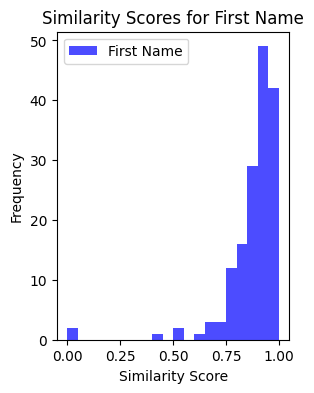

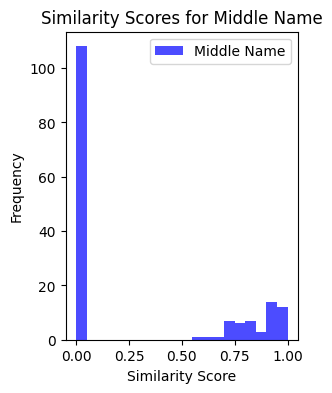

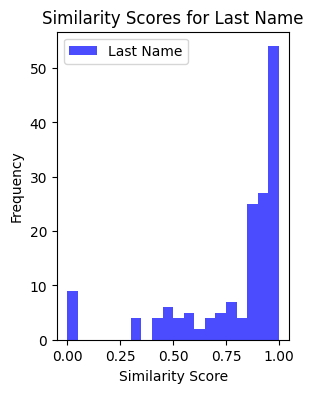

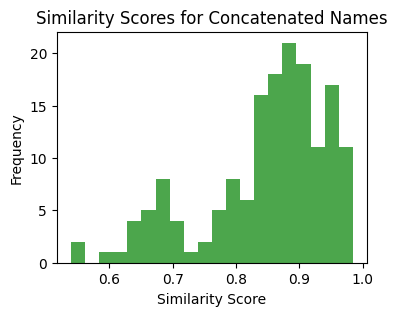

In [ ]:
import jellyfish
import matplotlib.pyplot as plt

# Calculating the  similarity scores for individual name components
individual_scores = train_new.apply(lambda row: {
  'First Name': jellyfish.jaro_winkler(row['First Name'], row['first_name']),
  'Middle Name': jellyfish.jaro_winkler(row['Middle Name'], row['Middle name']),
  'Last Name': jellyfish.jaro_winkler(row['Last Name'], row['last_name'])
}, axis=1, result_type='expand')

# Calculating the similarity scores for concatenated names
concat_scores = train_new.apply(lambda row: jellyfish.jaro_winkler(
    ' '.join([row['First Name'], row['Middle Name'], row['Last Name']]),
    ' '.join([row['first_name'], row['Middle name'], row['last_name']])
), axis=1)

# Ploting the similarity scores for individual name components
for col in individual_scores.columns:
  plt.figure(figsize=(3,4))
  plt.hist(individual_scores[col], bins=20, alpha=0.7, color='blue', label=col)
  plt.title(f"Similarity Scores for {col}")
  plt.xlabel("Similarity Score")
  plt.ylabel("Frequency")
  plt.legend()
  plt.show()

# Ploting the similarity scores for concatenated names
plt.figure(figsize=(4,3))
plt.hist(concat_scores, bins=20, alpha=0.7, color='green')
plt.title("Similarity Scores for Concatenated Names")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()


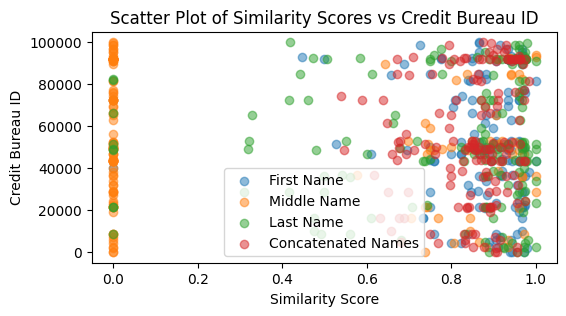

In [ ]:
# Combining the  individual and concatenated scores into one DataFrame
all_scores = pd.concat([individual_scores, pd.DataFrame({'Concatenated Names': concat_scores})], axis=1)

# A scatter plot with all similarity scores
plt.figure(figsize=(6, 3))
for col in all_scores.columns:
  plt.scatter(all_scores[col], train_new['Credit Bureau ID'], alpha=0.5, label=col)

plt.title("Scatter Plot of Similarity Scores vs Credit Bureau ID")
plt.xlabel("Similarity Score")
plt.ylabel("Credit Bureau ID")
plt.legend()
plt.show()

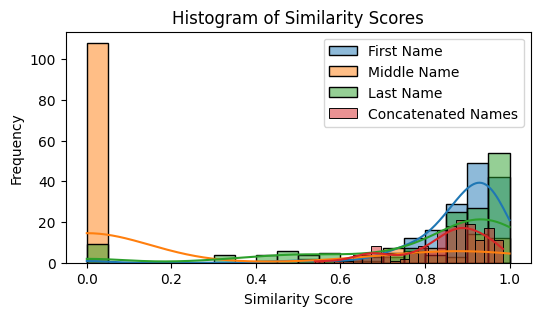

In [ ]:
#A histogram plot for all similarity scores
import seaborn as sns
plt.figure(figsize=(6, 3))
for col in all_scores.columns:
  sns.histplot(all_scores[col], bins=20, kde=True, label=col)

plt.title("Histogram of Similarity Scores")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

After this analysis decided to go with First name and last name individually, if needed will add concatinated scores to improve the performance. So adding those columns to train new data

In [ ]:
# Saving the similarities score into train dataframe
train_new['First Name Similarity'] = individual_scores['First Name']
train_new['Last Name Similarity'] = individual_scores['Last Name']

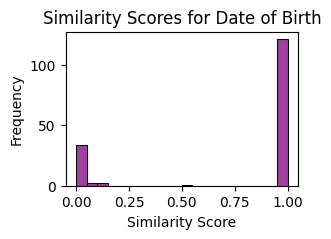

In [ ]:
# Similarity scores for date of birth
def calculate_dob_similarity(row):
  if row['DOB_x'] == 'not clear' or row['DOB_y'] == 'not clear':
    return 0
  try:
    dob_x = datetime.strptime(row['DOB_x'], '%m/%d/%Y')
    dob_y = datetime.strptime(row['DOB_y'], '%m/%d/%Y')
  except ValueError:
    return 0

  # Calculating the similarity score considering different cases
  if dob_x.year and dob_x.month and dob_x.day:
    similarity = 1 / (1 + abs((dob_x - dob_y).days))
  elif dob_x.year == dob_y.year and dob_x.month == dob_y.month:
    similarity = 0.8
  elif dob_x.year == dob_y.year and dob_x.day == dob_y.day:
    similarity = 0.8
  elif dob_x.month == dob_y.month and dob_x.day == dob_y.day:
    similarity = 0.8
  elif dob_x.year == dob_y.year:
    similarity = 0.6
  elif dob_x.month == dob_y.month:
    similarity = 0.6
  elif dob_x.day == dob_y.day:
    similarity = 0.6
  else:
    similarity = 0.3
  return similarity

# Calculating and storing the similarity scores in the train_new DataFrame
train_new['DOB_similarity'] = train_new.apply(calculate_dob_similarity, axis=1)

# Plot of similarity scores for date of birth
plt.figure(figsize=(3, 2))
sns.histplot(train_new['DOB_similarity'], bins=20, color='purple')
plt.title("Similarity Scores for Date of Birth")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()


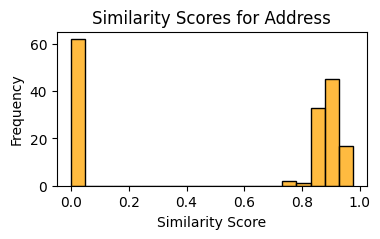

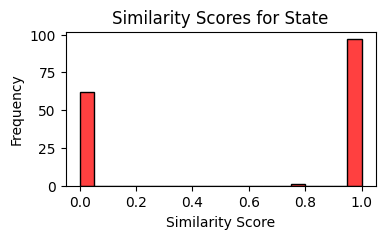

In [ ]:
# Calculating similarity score for address
def calculate_address_similarity(row):
  address_x = row['Address Line 1']
  address_y = row['addr 1']

  if pd.isnull(address_x) or pd.isnull(address_y):
    return 0

  return jellyfish.jaro_winkler(address_x, address_y)

# Calculating the similarity score for state
def calculate_state_similarity(row):
  state_x = row['State']
  state_y = row['state']

  if pd.isnull(state_x) or pd.isnull(state_y):
    return 0

  return jellyfish.jaro_winkler(state_x, state_y)

#similarity scores for address and state
train_new['Address Similarity'] = train_new.apply(calculate_address_similarity, axis=1)
train_new['State Similarity'] = train_new.apply(calculate_state_similarity, axis=1)

# Ploting similarity scores for address
plt.figure(figsize=(4, 2))
sns.histplot(train_new['Address Similarity'], bins=20, color='orange')
plt.title("Similarity Scores for Address")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()

# Ploting similarity scores for state
plt.figure(figsize=(4, 2))
sns.histplot(train_new['State Similarity'], bins=20, color='red')
plt.title("Similarity Scores for State")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()


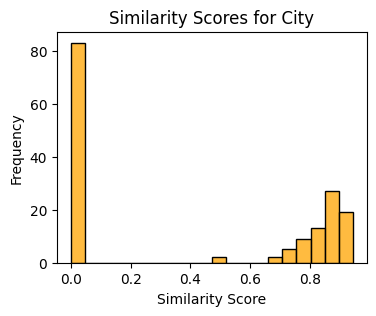

In [ ]:
# Calculating the similarity scores for city
def calculate_city_similarity(row):
  city_x = row['City']
  city_y = row['city']
  if not city_x or not city_y:
    return 0
  similarity = jellyfish.jaro_winkler(city_x, city_y)
  return similarity

# Calculating and storing the similarity scores in the train_new DataFrame
train_new['City Similarity'] = train_new.apply(calculate_city_similarity, axis=1)

# Plot of similarity scores for city
plt.figure(figsize=(4, 3))
sns.histplot(train_new['City Similarity'], bins=20, color='orange')
plt.title("Similarity Scores for City")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()

In [ ]:
train_new.columns


Index(['Cust ID', 'First Name', 'Middle Name', 'Last Name', 'Prefix', 'Suffix',
       'Address Line 1', 'Address Line 2', 'City', 'State', 'Zip', 'DOB_x',
       'Credit Bureau ID', 'id', 'first_name', 'Middle name', 'last_name',
       'prefix', 'suffix', 'addr 1', 'addr 2', 'city', 'state', 'zip', 'DOB_y',
       'First Name Similarity', 'Last Name Similarity', 'DOB_similarity',
       'Address Similarity', 'State Similarity', 'City Similarity'],
      dtype='object')

## Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.preprocessing import OneHotEncoder
import time

# Load the credit bureau data here
id_listing = pd.read_excel(credit_bureau_data_path)

# Features columns for training
training_features_columns = ['First Name', 'Last Name', 'City', 'DOB_x', 'Address Line 1', 'State']
training_weights_columns = ['First Name Similarity', 'Last Name Similarity', 'DOB_similarity',
                            'Address Similarity', 'State Similarity', 'City Similarity']

# Preparing the train data
X_train = train_new[training_features_columns]
y_train = train_new['Credit Bureau ID']

# Converting columns to string where needed
string_columns = ['First Name', 'Last Name', 'City', 'DOB_x', 'Address Line 1', 'State']
X_train[string_columns] = X_train[string_columns].astype(str)

# Calculated aggregated weights (e.g., average similarity scores)
sample_weights = train_new[training_weights_columns].mean(axis=1)

# Performing one-hot encoding for categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = encoder.fit_transform(X_train)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(X_train.columns))

# Concatenated and  encoded features with the original dataset
X_train = pd.concat([X_train.drop(training_features_columns, axis=1), X_train_encoded], axis=1)

# Instantiated and trained the logistic regression model with weights
start_time = time.time()
model = LogisticRegression()
model.fit(X_train, y_train, sample_weight=sample_weights)
end_time = time.time()

# Calculating processing time
processing_time = end_time - start_time

# Predict training labels
y_train_pred = model.predict(X_train)

# DataFrame of predictions with ID and predicted label
train_predictions_df = pd.DataFrame({'Cust ID': train_new['Cust ID'], 'Predicted Label': y_train_pred})

# Saving the train predictions to a CSV file
train_predictions_df.to_csv('train_predictions.csv', index=False)

# Calculating and printing accuracy, precision, and F1-score
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, average='weighted')
f1 = f1_score(y_train, y_train_pred, average='weighted')

print(f"Training Accuracy: {accuracy:.4f}")
print(f"Training Precision: {precision:.4f}")
print(f"Training F1-Score: {f1:.4f}")
print(f"Processing Time: {processing_time:.4f} seconds")


<ipython-input-105-6ba80880c622>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[string_columns] = X_train[string_columns].astype(str)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training Accuracy: 0.9437
Training Precision: 0.9278
Training F1-Score: 0.9317
Processing Time: 0.7409 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Blocking of the customer bureau data

By iusing the record linkage trying to do blocking which indeed reduces the process time

In [ ]:
!pip install recordlinkage -q

In [ ]:
import recordlinkage


# Defining the blocking attributes
id_listing_blocking_attributes = ['first_name', 'last_name', 'DOB']

# Converting datetime values to strings
id_listing['DOB'] = id_listing['DOB'].astype(str)

# Created blocking keys for id_listing data
id_listing['blocking_key'] = id_listing[id_listing_blocking_attributes].apply(lambda row: '_'.join(row), axis=1)


In [ ]:
testing_features_columns = ['Cust ID', 'First Name', 'Last Name', 'City', 'DOB_x', 'Address Line 1', 'State']
test_blocking_attributes = ['First Name', 'Last Name', 'DOB_x']
test_data = test_new[testing_features_columns]

# Converted datetime values to strings
test_data['DOB_x'] = test_data['DOB_x'].astype(str)
# Created blocking keys for test data
test_data['blocking_key'] = test_data[test_blocking_attributes].apply(lambda row: '_'.join(row), axis=1)


<ipython-input-90-c1a6efa9e5cb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['DOB_x'] = test_data['DOB_x'].astype(str)
<ipython-input-90-c1a6efa9e5cb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['blocking_key'] = test_data[test_blocking_attributes].apply(lambda row: '_'.join(row), axis=1)


In [ ]:
# Initialized the indexer for record linkage
indexer = recordlinkage.Index()

# Used the sorted neighborhood method for blocking
indexer.sortedneighbourhood(left_on='blocking_key', right_on='blocking_key')

# Getting the pairs of potential matches
pairs = indexer.index(id_listing, test_data)
print(pairs)

# Initialized the compare object
compare_cl = recordlinkage.Compare()

# Adding comparison methods
compare_cl.string('first_name', 'First Name', method='jarowinkler', threshold=0.85, label='first_name')
compare_cl.string('last_name', 'Last Name', method='jarowinkler', threshold=0.85, label='last_name')

# Computing the similarity matrix
similarity_matrix = compare_cl.compute(pairs, id_listing, test_data)

# Getting the potential matching pairs based on similarity thresholds
potential_matches = similarity_matrix[similarity_matrix.sum(axis=1) >= 1.7]

# Created a DataFrame to store the matching IDs
matching_ids_df = pd.DataFrame(columns=['Cust_id', 'Matching_id'])

# Looping through the potential matches and extract IDs
for test_idx, listing_idx in potential_matches.index:
    test_id = test_data.loc[test_idx, 'Cust ID']
    listing_id = id_listing.loc[listing_idx, 'ID']
    matching_ids_df = matching_ids_df.append({'Cust_id': test_id, 'Matching_id': listing_id}, ignore_index=True)

# Saving the matching IDs to a CSV file
matching_ids_df.to_csv('matching_ids.csv', index=False)

print("Matching IDs saved to matching_ids.csv")


MultiIndex([( 73614, 44),
            (100273, 42),
            ( 73611, 28)],
           )
Matching IDs saved to matching_ids.csv


In [ ]:
from tqdm import tqdm
from jellyfish import jaro_winkler_similarity


#  Blocking attributes for test data
test_blocking_attributes = ['First Name', 'Last Name', 'DOB_x']

# Converting datetime values to strings
test_data['DOB'] = test_data['DOB_x'].astype(str)

# A DataFrame to store matching results
matching_results = []

# Iterated over each entity in the test data
for test_index, test_row in tqdm(test_data.iterrows(), total=len(test_data)):
  best_match_similarity = 0
  best_match_id = None

  # Iterated over each entity in the id_listing
  for id_listing_index, id_listing_row in id_listing.iterrows():
    # Calculating the Jaro-Winkler similarity for the blocking attributes
    similarity = jaro_winkler_similarity(
      f"{test_row['First Name']}_{test_row['Last Name']}_{test_row['DOB']}",
      f"{id_listing_row['first_name']}_{id_listing_row['last_name']}_{id_listing_row['DOB']}"
    )

    # Best match if similarity is higher
    if similarity > best_match_similarity:
      best_match_similarity = similarity
      best_match_id = id_listing_row['id']

  # Appending the matching result to the list
  matching_results.append({'Cust_ID': test_row['Cust ID'], 'Matching_id': best_match_id})

# DataFrame from matching_results
matching_ids_df = pd.DataFrame(matching_results)

# Saving the matching IDs to a CSV file
matching_ids_df.to_csv('matching_ids.csv', index=False)

print("Matching IDs saved to matching_ids.csv")


<ipython-input-92-b0f1d204180a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['DOB'] = test_data['DOB_x'].astype(str)
100%|██████████| 54/54 [06:54<00:00,  7.67s/it]

Matching IDs saved to matching_ids.csv


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Merging matching_ids_df with test_out_data on Cust_ID and Credit Bureau ID
merged_data = pd.merge(matching_ids_df, test_out, left_on='Cust_ID', right_on='Cust ID')

# Metrics
y_true = merged_data['Credit Bureau ID']
y_pred = merged_data['Matching_id']

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# The metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.1481
Precision: 0.1481
Recall: 0.1481
F1-Score: 0.1481


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def calculate_date_of_birth_similarity(dob_x, dob_y):
  if dob_x == 'not clear' or dob_y == 'not clear':
    return 0

  try:
    dob_x = datetime.strptime(dob_x, '%m/%d/%Y')
    dob_y = datetime.strptime(dob_y, '%m/%d/%Y')
  except ValueError:
    return 0

  # Calculating similarity score considering different cases
  if dob_x.year and dob_x.month and dob_x.day:
    similarity = 1 / (1 + abs((dob_x - dob_y).days))
  elif dob_x.year == dob_y.year and dob_x.month == dob_y.month:
    similarity = 0.8
  elif dob_x.year == dob_y.year and dob_x.day == dob_y.day:
    similarity = 0.8
  elif dob_x.month == dob_y.month and dob_x.day == dob_y.day:
    similarity = 0.8
  elif dob_x.year == dob_y.year:
    similarity = 0.6
  elif dob_x.month == dob_y.month:
    similarity = 0.6
  elif dob_x.day == dob_y.day:
    similarity = 0.6
  else:
    similarity = 0.3
  return similarity
  calculate_date_of_birth_similarity(test_row['DOB_x'], id_listing_row['DOB'])

##### Cleaning the validation dataset

In [ ]:
val_in.isna().sum()

Cust ID            0
First Name         0
Middle Name       16
Last Name          0
Prefix            54
Suffix            51
Address Line 1     0
Address Line 2    46
City               0
State              0
Zip                0
DOB                0
dtype: int64

In [ ]:
#Handling the missing values
# Filling these columns with empty string placeholder
empty_placeholder_columns = ['Middle Name', 'Prefix', 'Suffix','Address Line 2']

# Applying empty string placeholder
val_in[empty_placeholder_columns] = val_in[empty_placeholder_columns].fillna('')

In [ ]:
#standardizing the validation data
# Make a copy of the DataFrame to work with
val_in_new = val_in.copy()

# Standardizing the DOB format to month/day/year
val_in_new.loc[:, 'DOB'] = val_in_new['DOB'].apply(custom_parse)


# Guessing the state names using mapping and guessing
val_in_new.loc[:, 'State'] = val_in_new['State'].apply(guess_state)

# Standardizing Zip Code format to first five characters
val_in_new.loc[:, 'Zip'] = val_in_new['Zip'].apply(lambda zip_code: re.sub(r'[^\d-]', '', str(zip_code)))


# Standardizing the name columns to lowercase and removing the leading/trailing spaces, also cleaning the ,
name_columns = ['First Name', 'Middle Name', 'Last Name']
for col in name_columns:
  val_in_new.loc[:, col] = val_in_new[col].str.strip().str.lower()
  val_in_new[col] = val_in_new[col].str.split(',').apply(lambda parts: [part.strip() for part in parts])
  val_in_new[col] = val_in_new[col].apply(lambda parts: ' '.join(parts) if parts and len(parts[0]) > 0 else '')


# Standardizing the address columns to lowercase and remove leading/trailing spaces
address_columns = ['Address Line 1', 'Address Line 2']
for col in address_columns:
  val_in_new.loc[:, col] = val_in_new[col].str.strip().str.lower()


# Standardizing the City column using lowercase, removing leading/trailing spaces, and non-alphanumeric characters
val_in_new['City'] = val_in_new['City'].str.strip().str.lower().apply(lambda city: re.sub(r'[^a-zA-Z0-9\s]', '', city))


In [ ]:
val_in_new.columns

Index(['Cust ID', 'First Name', 'Middle Name', 'Last Name', 'Prefix', 'Suffix',
       'Address Line 1', 'Address Line 2', 'City', 'State', 'Zip', 'DOB'],
      dtype='object')

In [ ]:
from tqdm import tqdm
from jellyfish import jaro_winkler_similarity

# Blocking attributes for validation data
val_blocking_attributes = ['First Name', 'Last Name', 'DOB']

# Converting datetime values to strings
val_in_new['DOB'] = val_in_new['DOB'].astype(str)

# A DataFrame to store matching results
matching_results = []

# Iterate over each entity in the validation data
for val_index, val_row in tqdm(val_in_new.iterrows(), total=len(val_in_new)):
    best_match_similarity = 0
    best_match_id = None

    for id_listing_index, id_listing_row in id_listing.iterrows():
        # Calculating the Jaro-Winkler similarity for the blocking attributes
        similarity = jaro_winkler_similarity(
            f"{val_row['First Name']}_{val_row['Last Name']}_{val_row['DOB']}",
            f"{id_listing_row['first_name']}_{id_listing_row['last_name']}_{id_listing_row['DOB']}"
        )

        # Best match if similarity is higher
        if similarity > best_match_similarity:
            best_match_similarity = similarity
            best_match_id = id_listing_row['id']

    # Appending the matching result to the list
    matching_results.append({'Cust_ID': val_row['Cust ID'], 'Matching_id': best_match_id})

# DataFrame from matching_results
matching_ids_df = pd.DataFrame(matching_results)

# Saving the matching IDs to a CSV file
matching_ids_df.to_csv('matching_ids_validation.csv', index=False)

print("Matching IDs for validation data saved to matching_ids_validation.csv")


100%|██████████| 54/54 [07:01<00:00,  7.80s/it]

Matching IDs for validation data saved to matching_ids_validation.csv


## Application Form
###### Using Flask and ngrok

In [ ]:
!pip install flask-ngrok -q


In [ ]:
!pip install pyngrok -q


In [ ]:
from IPython.display import display, HTML
html_form = """
<!DOCTYPE html>
<html>
<head>
    <title>New Account Application Form</title>
</head>
<body>
     <form action="#" method="post">
    <h1>New Account Application Form</h1>
    <form action="/application_form" method="post">
        <!-- Account Holder Information -->
        <h2>Account Holder Information</h2>
        <label for="first_name">First Name:</label>
        <input type="text" name="first_name" required><br>

        <label for="middle_name">Middle Name:</label>
        <input type="text" name="middle_name"><br>

        <label for="last_name">Last Name:</label>
        <input type="text" name="last_name" required><br>

        <label for="title">Title:</label>
        <input type="text" name="title"><br>

        <label for="suffix">Suffix:</label>
        <input type="text" name="suffix"><br>

        <label for="date_of_birth">Date of Birth:</label>
        <input type="date" name="date_of_birth" required><br>

        <label for="ssn">Social Security Number:</label>
        <input type="text" name="ssn" required><br>

        <label for="gender">Gender:</label>
        <input type="text" name="gender"><br>

        <label for="nationality">Nationality:</label>
        <input type="text" name="nationality"><br>

        <label for="marital_status">Marital Status:</label>
        <input type="text" name="marital_status"><br>

        <!-- Contact Information -->
        <h2>Contact Information</h2>
        <label for="address">Address:</label>
        <input type="text" name="address" required><br>

        <label for="address_2">Address 2:</label>
        <input type="text" name="address_2"><br>

        <label for="city">City:</label>
        <input type="text" name="city"><br>

        <label for="state">State/Province:</label>
        <input type="text" name="state"><br>

        <label for="state_abbr">State Abbreviation:</label>
        <input type="text" name="state_abbr"><br>

        <label for="postal_code">Postal/ZIP Code:</label>
        <input type="text" name="postal_code"><br>

        <label for="country">Country:</label>
        <input type="text" name="country"><br>

        <label for="email">Email Address:</label>
        <input type="email" name="email" required><br>

        <label for="phone_number">Phone Number:</label>
        <input type="tel" name="phone_number"><br>

        <label for="mobile_number">Mobile Number:</label>
        <input type="tel" name="mobile_number"><br>

        <label for="perm_addr_diff">Permanent Address Different:</label>
        <input type="checkbox" name="perm_addr_diff"><br>

        <label for="permanent_address_1">Permanent Address 1:</label>
        <input type="text" name="permanent_address_1"><br>

        <label for="permanent_address_2">Permanent Address 2:</label>
        <input type="text" name="permanent_address_2"><br>

        <label for="permanent_city">Permanent City:</label>
        <input type="text" name="permanent_city"><br>

        <label for="permanent_state">Permanent State/Province:</label>
        <input type="text" name="permanent_state"><br>

        <label for="permanent_state_abbr">Permanent State Abbreviation:</label>
        <input type="text" name="permanent_state_abbr"><br>

        <label for="permanent_postal_code">Permanent Postal/ZIP Code:</label>
        <input type="text" name="permanent_postal_code"><br>

        <label for="permanent_country">Permanent Country:</label>
        <input type="text" name="permanent_country"><br>

        <!-- Identification and Verification -->
        <h2>Identification and Verification</h2>
        <label for="gov_id_type">Government-Issued ID Type:</label>
        <input type="text" name="gov_id_type" required><br>

        <label for="id_number">ID Number:</label>
        <input type="text" name="id_number" required><br>

        <label for="id_expiration_date">ID Expiration Date:</label>
        <input type="date" name="id_expiration_date"><br>

        <!-- Financial Information -->
        <h2>Financial Information</h2>
        <h2>Financial Information</h2>
        <label for="employment_status">Employment Status:</label>
        <select id="employment_status" name="employment_status">
            <option value="Employed">Employed</option>
            <option value="Self-Employed">Self-Employed</option>
            <option value="Unemployed">Unemployed</option>
        </select>
        <br>
        <label for="annual_income">Annual Income:</label>
        <input type="text" id="annual_income" name="annual_income">
        <br>
        <label for="employer_name">Employer's Name:</label>
        <input type="text" id="employer_name" name="employer_name">
        <br>
        <!-- Include other financial fields here -->

        <!-- Occupation -->
        <label for="occupation">Occupation:</label>
        <input type="text" id="occupation" name="occupation">
        <br>

        <!-- Images -->
        <h2>Images</h2>
        <label for="front_image">Front Image Upload:</label>
        <input type="file" id="front_image" name="front_image">
        <br>
        <label for="back_image">Back Image Upload:</label>
        <input type="file" id="back_image" name="back_image">
        <br>
        <h2> Submit Application</h2>
        <input type="submit" value="Submit">
         </form>
</body>
</html>
        """
display(HTML(html_form))

In [ ]:
from flask import Flask, request, render_template
from IPython.display import display, HTML
from pyngrok import ngrok

In [ ]:
port_no=5000

In [ ]:
from logging import PercentStyle
app = Flask(__name__, template_folder="/content/drive/MyDrive/templates")
ngrok.set_auth_token("2TzEyQyfraG2Z4nEhVnmhkc1g42_32rwiBao1Tuj5HVVcePan")
public_url =  ngrok.connect(port_no).public_url
public_url = public_url.replace("http://", "https://")


# @app.route("/")
# def home():
#     return f"Running Flask on Google Colab!"

# print(f"To acces the Gloable link please click {public_url}")

@app.route("/application_form", methods=["GET", "POST"])
def application_form():
  if request.method == "POST":
    # Retrieve form data
    first_name = request.form.get("first_name")
    middle_name = request.form.get("middle_name")
    last_name = request.form.get("last_name")
    title = request.form.get("title")
    suffix = request.form.get("suffix")
    date_of_birth = request.form.get("date_of_birth")
    ssn = request.form.get("ssn")
    gender = request.form.get("gender")
    nationality = request.form.get("nationality")
    marital_status = request.form.get("marital_status")
    address = request.form.get("address")
    address_2 = request.form.get("address_2")
    city = request.form.get("city")
    state = request.form.get("state")
    state_abbr = request.form.get("state_abbr")
    postal_code = request.form.get("postal_code")
    country = request.form.get("country")
    email = request.form.get("email")
    phone_number = request.form.get("phone_number")
    mobile_number = request.form.get("mobile_number")
    perm_addr_diff = request.form.get("perm_addr_diff")
    permanent_address_1 = request.form.get("permanent_address_1")
    permanent_address_2 = request.form.get("permanent_address_2")
    permanent_city = request.form.get("permanent_city")
    permanent_state = request.form.get("permanent_state")
    permanent_state_abbr = request.form.get("permanent_state_abbr")
    permanent_postal_code = request.form.get("permanent_postal_code")
    permanent_country = request.form.get("permanent_country")
    gov_id_type = request.form.get("gov_id_type")
    id_number = request.form.get("id_number")
    id_expiration_date = request.form.get("id_expiration_date")
    employment_status = request.form.get("employment_status")
    annual_income = request.form.get("annual_income")
    employer_name = request.form.get("employer_name")
    employer_address = request.form.get("employer_address")
    employer_address_2 = request.form.get("employer_address_2")
    employer_city = request.form.get("employer_city")
    employer_state = request.form.get("employer_state")
    employer_state_abbr = request.form.get("employer_state_abbr")
    employer_postal_code = request.form.get("employer_postal_code")
    employer_country = request.form.get("employer_country")
    occupation = request.form.get("occupation")

    # Process the form data (you can store it in a database, for example)
    print("Form submitted:")
    print(f"First Name: {first_name}")
    print(f"Middle Name: {middle_name}")
    print(f"Last Name: {last_name}")
    print(f"Title: {title}")
    print(f"Suffix: {suffix}")
    print(f"Date of Birth: {date_of_birth}")
    print(f"SSN: {ssn}")
    print(f"Gender: {gender}")
    print(f"Nationality: {nationality}")
    print(f"Marital Status: {marital_status}")
    print(f"Address: {address}")
    print(f"Address 2: {address_2}")
    print(f"City: {city}")
    print(f"State: {state}")
    print(f"State Abbreviation: {state_abbr}")
    print(f"Postal Code: {postal_code}")
    print(f"Country: {country}")
    print(f"Email: {email}")
    print(f"Phone Number: {phone_number}")
    print(f"Mobile Number: {mobile_number}")
    print(f"Permanent Address Different: {perm_addr_diff}")
    print(f"Permanent Address 1: {permanent_address_1}")
    print(f"Permanent Address 2: {permanent_address_2}")
    print(f"Permanent City: {permanent_city}")
    print(f"Permanent State: {permanent_state}")
    print(f"Permanent State Abbreviation: {permanent_state_abbr}")
    print(f"Permanent Postal Code: {permanent_postal_code}")
    print(f"Permanent Country: {permanent_country}")
    print(f"Government ID Type: {gov_id_type}")
    print(f"ID Number: {id_number}")
    print(f"ID Expiration Date: {id_expiration_date}")
    print(f"Employment Status: {employment_status}")
    print(f"Annual Income: {annual_income}")
    print(f"Employer Name: {employer_name}")
    print(f"Employer Address: {employer_address}")
    print(f"Employer Address 2: {employer_address_2}")
    print(f"Employer City: {employer_city}")
    print(f"Employer State: {employer_state}")
    print(f"Employer State Abbreviation: {employer_state_abbr}")
    print(f"Employer Postal Code: {employer_postal_code}")
    print(f"Employer Country: {employer_country}")
    print(f"Occupation: {occupation}")

    return render_template("application_form.html")

  return render_template("application_form.html")


print(f"To acces the Gloable link please click {public_url}")
if __name__ == "__main__":
    app.run(port=port_no)


To acces the Gloable link please click https://0ce1-34-85-193-80.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [14/Aug/2023 18:43:43] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [14/Aug/2023 18:43:44] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
from IPython.display import HTML, display
import pandas as pd

def autofill_form(data):
    html_form = """
    <form action="#" method="post">
        <!-- Account Holder Information -->
        <h2>Account Holder Information</h2>
        <label for="first_name">First Name:</label>
        <input type="text" name="first_name" value="{}"><br>
        <label for="middle_name">Middle Name:</label>
        <input type="text" name="middle_name" value="{}"><br>
        <label for="last_name">Last Name:</label>
        <input type="text" name="last_name" value="{}"><br>

        <!-- Contact Information -->
        <h2>Contact Information</h2>
        <!-- Add more contact fields here -->

        <!-- Identification and Verification -->
        <h2>Identification and Verification</h2>
        <!-- Add more identification fields here -->

        <!-- Financial Information -->
        <h2>Financial Information</h2>
        <!-- Add more financial fields here -->

        <!-- Occupation -->
        <h2>Occupation</h2>
        <!-- Add more occupation fields here -->

        <!-- Images -->
        <h2>Images</h2>
        <!-- Add more image upload fields here -->

        <!-- Submit Application -->
        <h2>Submit Application</h2>
        <input type="submit" value="Submit">
    </form>
    """.format(data.get("first_name", ""), data.get("middle_name", ""), data.get("last_name", ""))

    display(HTML(html_form))

train = train_in.merge(train_predictions_df,left_on='Cust ID',right_on = 'Cust ID')
train = train.merge(id_listing,left_on='Credit Bureau ID',right_on='id')
df = pd.DataFrame(train)

# Get the first row of the DataFrame
form_data = df.iloc[0]

# Call the autofill function with the example data
autofill_form(form_data)
